# CS506 Midterm
### Name: Andrew Tuckman
### BUID: U40643751

## Load files into DataFrames:

In [1]:
import pandas as pd
train = pd.read_csv("./data/train.csv")

## Feature extraction:

In [2]:
train = train[['Score','Text']]

In [3]:
print(train)

         Score                                               Text
0          4.0  This is a charming version of the classic Dick...
1          3.0  It was good but not as emotionally moving as t...
2          3.0  Don't get me wrong, Winkler is a wonderful cha...
3          5.0  Henry Winkler is very good in this twist on th...
4          4.0  This is one of the best Scrooge movies out.  H...
...        ...                                                ...
1697528    NaN  wow $269.99 for the entire series on Blu Ray??...
1697529    5.0  Finally, the holy grail of tv-on-dvd boxsets i...
1697530    5.0  Could this be a true or I'm i dreaming batman ...
1697531    5.0  I've been a fan of the series since I was a yo...
1697532    5.0  People seriously need to wake up and realize t...

[1697533 rows x 2 columns]


## Drop null values:

In [4]:
train = train.dropna()

In [5]:
print(train)

         Score                                               Text
0          4.0  This is a charming version of the classic Dick...
1          3.0  It was good but not as emotionally moving as t...
2          3.0  Don't get me wrong, Winkler is a wonderful cha...
3          5.0  Henry Winkler is very good in this twist on th...
4          4.0  This is one of the best Scrooge movies out.  H...
...        ...                                                ...
1697526    4.0  Looking very much forward to this release, but...
1697529    5.0  Finally, the holy grail of tv-on-dvd boxsets i...
1697530    5.0  Could this be a true or I'm i dreaming batman ...
1697531    5.0  I've been a fan of the series since I was a yo...
1697532    5.0  People seriously need to wake up and realize t...

[1397480 rows x 2 columns]


## - Text Pre-processing -
###  Remove characters from strings:

In [6]:
import re

expr_pattern = re.compile(pattern = r"[\W\S]+", flags = 0)
train['Text'] = [expr_pattern.sub('', word) for word in train['Text'].tolist()]

### Convert string sentences to list of lowercase string words:

In [7]:
train['Text'] = train['Text'].str.lower().str.split()

In [8]:
print(train)

         Score                                               Text
0          4.0  [this, is, a, charming, version, of, the, clas...
1          3.0  [it, was, good, but, not, as, emotionally, mov...
2          3.0  [dont, get, me, wrong, winkler, is, a, wonderf...
3          5.0  [henry, winkler, is, very, good, in, this, twi...
4          4.0  [this, is, one, of, the, best, scrooge, movies...
...        ...                                                ...
1697526    4.0  [looking, very, much, forward, to, this, relea...
1697529    5.0  [finally, the, holy, grail, of, tvondvd, boxse...
1697530    5.0  [could, this, be, a, true, or, im, i, dreaming...
1697531    5.0  [ive, been, a, fan, of, the, series, since, i,...
1697532    5.0  [people, seriously, need, to, wake, up, and, r...

[1397480 rows x 2 columns]


### Remove stop words:

In [9]:
stopwords_list = ['i', "i've", "ive", 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "youre", "you've", "youve", "you'll", "you'd", "youll", "youd", 'your', 'yours', 'yourself', 
'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", "shes", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 
'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", "thatll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 
'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 
'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 
'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", "dont", 'should', "should've", "shouldve",
'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", "arent", 'couldn', "couldn't", "couldnt", 'didn', "didn't", "didnt", 'doesn', "doesn't", "doesnt", 'hadn', "hadn't", "hadnt", 'hasn', 
"hasn't", "hasnt", 'haven', "haven't", "havent", 'isn', "isn't", "isnt", 'ma', 'mightn', "mightn't", "mightnt", 'mustn', "mustn't", "mustnt", 'needn', "needn't", "neednt", 'shan', "shan't", "shant", 'shouldn', "shouldn't", "shouldnt", 
'wasn', "wasn't", "wasnt", 'weren', "weren't", "werent", 'won', "won't", "wont", 'wouldn', "wouldn't", "wouldnt"]

In [10]:
train['Text'] = train['Text'].apply(lambda review: [word for word in review if word not in stopwords_list])

In [11]:
print(train)

         Score                                               Text
0          4.0  [this, is, a, charming, version, of, the, clas...
1          3.0  [it, was, good, but, not, as, emotionally, mov...
2          3.0  [dont, get, me, wrong, winkler, is, a, wonderf...
3          5.0  [henry, winkler, is, very, good, in, this, twi...
4          4.0  [this, is, one, of, the, best, scrooge, movies...
...        ...                                                ...
1697526    4.0  [looking, very, much, forward, to, this, relea...
1697529    5.0  [finally, the, holy, grail, of, tvondvd, boxse...
1697530    5.0  [could, this, be, a, true, or, im, i, dreaming...
1697531    5.0  [ive, been, a, fan, of, the, series, since, i,...
1697532    5.0  [people, seriously, need, to, wake, up, and, r...

[1397480 rows x 2 columns]


### Convert lists back into strings:

In [12]:
train['Text'] = train['Text'].apply(', '.join)
expr_pattern1 = re.compile(pattern = r"[\W\S]+", flags = 0)
train['Text'] = [expr_pattern1.sub('', x) for x in train['Text'].tolist()]
train['Text'] = train['Text'].str.lower()

In [13]:
print(train)

         Score                                               Text
0          4.0  this is a charming version of the classic dick...
1          3.0  it was good but not as emotionally moving as t...
2          3.0  dont get me wrong winkler is a wonderful chara...
3          5.0  henry winkler is very good in this twist on th...
4          4.0  this is one of the best scrooge movies out hen...
...        ...                                                ...
1697526    4.0  looking very much forward to this release but ...
1697529    5.0  finally the holy grail of tvondvd boxsets is c...
1697530    5.0  could this be a true or im i dreaming batman i...
1697531    5.0  ive been a fan of the series since i was a you...
1697532    5.0  people seriously need to wake up and realize t...

[1397480 rows x 2 columns]


## - Fit data -

### Extract two columns of data:

In [14]:
X_train = train['Text']
y_train = train['Score']

### Vectorize the review column 'Text':

In [15]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.svm import LinearSVC

# vectorizer = TfidfVectorizer()
# X_train_vectorized = vectorizer.fit_transform(X_train)

### Fit training data using Linear Support Vector Classifier:

In [16]:
# clf = LinearSVC(dual = False, C = 0.5)
# clf.fit(X = X_train_vectorized, y = y_train)

### Implement a Pipeline to perform Vectorization and Classifier together:

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

clf = Pipeline(steps = [('tfidfvectorizer', TfidfVectorizer()), ('linearsvc', LinearSVC(dual = False, C = 0.2))])
clf.fit(X = X_train, y = y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', LinearSVC(C=0.5, dual=False))])

## Preparing test file:

In [82]:
test = pd.read_csv("./data/test.csv")

In [83]:
print(test)

             Id  Score
0             5    NaN
1            11    NaN
2            17    NaN
3            46    NaN
4            47    NaN
...         ...    ...
299995  1697520    NaN
299996  1697522    NaN
299997  1697524    NaN
299998  1697527    NaN
299999  1697528    NaN

[300000 rows x 2 columns]


In [84]:
train2 = pd.read_csv("./data/train.csv")


In [85]:
print(train2)

              Id   ProductId          UserId  HelpfulnessNumerator  \
0              0  0005019281   ADZPIG9QOCDG5                     0   
1              1  0005019281  A35947ZP82G7JH                     0   
2              2  0005019281  A3UORV8A9D5L2E                     0   
3              3  0005019281  A1VKW06X1O2X7V                     0   
4              4  0005019281  A3R27T4HADWFFJ                     0   
...          ...         ...             ...                   ...   
1697528  1697528  B00LT1JHLW   AV657BUYHHXZ2                     1   
1697529  1697529  B00LT1JHLW  A17W587EH23J0Q                    32   
1697530  1697530  B00LT1JHLW  A3DE438TF1A958                     3   
1697531  1697531  B00LT1JHLW  A2RWCXDMANY0LW                     0   
1697532  1697532  B00LT1JHLW  A3ROPC55BE2OM9                    11   

         HelpfulnessDenominator  Score        Time  \
0                             0    4.0  1203984000   
1                             0    3.0  1388361600 

In [86]:
test2 = test.join(train2, on='Id', how = 'inner', lsuffix=' test_data', rsuffix=' train2')

In [87]:
print(test2)

             Id  Id test_data  Score test_data  Id train2   ProductId  \
0             5             5              NaN          5  0005019281   
1            11            11              NaN         11  0005019281   
2            17            17              NaN         17  0005019281   
3            46            46              NaN         46  0005019281   
4            47            47              NaN         47  0005019281   
...         ...           ...              ...        ...         ...   
299995  1697520       1697520              NaN    1697520  B00LH9ROKM   
299996  1697522       1697522              NaN    1697522  B00LT1JHLW   
299997  1697524       1697524              NaN    1697524  B00LT1JHLW   
299998  1697527       1697527              NaN    1697527  B00LT1JHLW   
299999  1697528       1697528              NaN    1697528  B00LT1JHLW   

                UserId  HelpfulnessNumerator  HelpfulnessDenominator  \
0       A2L0G56BNOTX6S                     0       

### Extracting usable columns:

In [88]:
test2_extract = test2[['Id','Text']]

In [89]:
print(test2_extract)

             Id                                               Text
0             5  This has been a favorite movie of mine for a l...
1            11  Even though i don't care for Henry Winklers  a...
2            17  Anorher good movie for holiday watchers..a lit...
3            46  My wife and I grew up in New Hampshire where t...
4            47  This is a first for me, I didn't like this mov...
...         ...                                                ...
299995  1697520  Just how seriously one should take Scott Derri...
299996  1697522  Let's be clear - the 5 stars are for the serie...
299997  1697524  I would also like to see the original 20th Cen...
299998  1697527  Finally to be released on DVD and Blu-Ray Nove...
299999  1697528  wow $269.99 for the entire series on Blu Ray??...

[300000 rows x 2 columns]


### Drop null values:

In [90]:
test2_extract = test2_extract .dropna()

In [91]:
print(test2_extract) 

             Id                                               Text
0             5  This has been a favorite movie of mine for a l...
1            11  Even though i don't care for Henry Winklers  a...
2            17  Anorher good movie for holiday watchers..a lit...
3            46  My wife and I grew up in New Hampshire where t...
4            47  This is a first for me, I didn't like this mov...
...         ...                                                ...
299995  1697520  Just how seriously one should take Scott Derri...
299996  1697522  Let's be clear - the 5 stars are for the serie...
299997  1697524  I would also like to see the original 20th Cen...
299998  1697527  Finally to be released on DVD and Blu-Ray Nove...
299999  1697528  wow $269.99 for the entire series on Blu Ray??...

[299991 rows x 2 columns]


## - Text pre-processing - (Same as before)
### Remove characters from strings:

In [92]:
expr_pattern2 = re.compile(pattern = r"[\W\S]+", flags = 0)
test2_extract['Text'] = [expr_pattern2.sub('', x) for x in test2_extract['Text'].tolist()]

In [93]:
print(test2_extract)

             Id Text
0             5     
1            11     
2            17     
3            46     
4            47     
...         ...  ...
299995  1697520     
299996  1697522     
299997  1697524     
299998  1697527     
299999  1697528     

[299991 rows x 2 columns]


### Convert string sentences to list of lowercase string words:

In [94]:
test2_extract['Text'] = test2_extract['Text'].str.lower().str.split()

In [95]:
print(test2_extract)

             Id Text
0             5   []
1            11   []
2            17   []
3            46   []
4            47   []
...         ...  ...
299995  1697520   []
299996  1697522   []
299997  1697524   []
299998  1697527   []
299999  1697528   []

[299991 rows x 2 columns]


### Remove stop words:

In [96]:
test2_extract['Text'] = test2_extract['Text'].apply(lambda review: [word for word in review if word not in stopwords_list])

In [97]:
print(test2_extract)

             Id Text
0             5   []
1            11   []
2            17   []
3            46   []
4            47   []
...         ...  ...
299995  1697520   []
299996  1697522   []
299997  1697524   []
299998  1697527   []
299999  1697528   []

[299991 rows x 2 columns]


### Convert lists back into strings:

In [98]:
test2_extract['Text'] = test2_extract['Text'].apply(', '.join)
expr_pattern3 = re.compile(pattern = r"[\W\S]+", flags = 0)
test2_extract['Text'] = [expr_pattern3.sub('', x) for x in test2_extract['Text'].tolist()]
test2_extract['Text'] = test2_extract['Text'].str.lower()

In [99]:
print(test2_extract)

             Id Text
0             5     
1            11     
2            17     
3            46     
4            47     
...         ...  ...
299995  1697520     
299996  1697522     
299997  1697524     
299998  1697527     
299999  1697528     

[299991 rows x 2 columns]


### Extract two columns of data:

In [100]:
X_test2 = test2_extract['Text']
y_test2 = test2_extract['Id']

In [101]:
# vectorizer2 = TfidfVectorizer()
# X_test2_vectorized = vectorizer2.fit_transform(X_test2)

In [102]:
# test2.Text = X_test2_vectorized

In [103]:
# print(test2)

## Creating the predictions:

In [104]:
predictions = clf.predict(X_test2)

### Initializing submission DataFrame:

In [105]:
submission = pd.DataFrame({'Id' : test2_extract['Id'], 'Score' : predictions})

In [106]:
print(submission)

             Id  Score
0             5    5.0
1            11    5.0
2            17    5.0
3            46    5.0
4            47    5.0
...         ...    ...
299995  1697520    5.0
299996  1697522    5.0
299997  1697524    5.0
299998  1697527    5.0
299999  1697528    5.0

[299991 rows x 2 columns]


In [107]:
final = test2.merge(submission, on = ['Id'])

In [108]:
final = test2[(~test2['Id'].isin(final['Id']))]

### Extract columns needed:

In [109]:
final = final[['Id', 'Score test_data']]

In [110]:
print(final)

             Id  Score test_data
18795    106563              NaN
43189    245184              NaN
153210   864850              NaN
180980  1022346              NaN
191684  1082487              NaN
197635  1116131              NaN
220075  1243416              NaN
221862  1253440              NaN
281151  1589648              NaN


### Rename columns for submission:

In [111]:
final = final.rename(columns = {'Score test_data' : 'Score'})

In [112]:
submission = submission.append(final)

### Filling null values with mean score:

In [113]:
submission['Score'].fillna(value = (submission['Score'].mean()), inplace = True)

### Save to .csv file:

In [114]:
submission.to_csv(path_or_buf = './data/my_submission3.csv', index = False)

In [115]:
best = pd.read_csv("./data/my_submission.csv")

In [116]:
print(best)

             Id     Score
0             5  5.000000
1            11  5.000000
2            17  5.000000
3            46  5.000000
4            47  1.000000
...         ...       ...
299995  1082487  4.410782
299996  1116131  4.410782
299997  1243416  4.410782
299998  1253440  4.410782
299999  1589648  4.410782

[300000 rows x 2 columns]


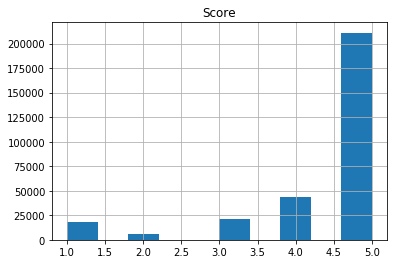

In [119]:
import matplotlib.pyplot as plt

best.hist(column = 'Score')
plt.show()